In [ ]:
# Importando as bibliotecas necessárias

import os
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
# Caminho para o arquivo ZIP
zip_file_path = "world-happiness-data-2024.zip"
# Descompactando o arquivo
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(".")

# Renomeando o arquivo descompactado para o nome correto.
if not os.path.exists("world_happiness_2024.csv"):
    os.rename("World Happiness Report 2024.csv", "world_happiness_2024.csv")
else:
    print("O arquivo 'world_happiness_2024.csv' já existe. Renomeação ignorada.")

O arquivo 'world_happiness_2024.csv' já existe. Renomeação ignorada.


In [ ]:
# Carregando e visualizando os dados

df = pd.read_csv("world_happiness_2024.csv")
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919


# Análise exploratória dos dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB


In [ ]:
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2363.000000,2363.000000,2335.000000,2350.000000,2300.000000,2327.000000,2282.000000,2238.000000,2339.000000,2347.000000
mean,2014.763860,5.483562,9.399673,0.809369,63.401828,0.750290,0.000096,0.743959,0.651878,0.273160
std,5.059436,1.125523,1.152062,0.121211,6.842644,0.139366,0.161386,0.184871,0.106249,0.087133
min,2005.000000,1.281271,5.526723,0.228217,6.720000,0.228301,-0.339547,0.035198,0.178886,0.082737
25%,2011.000000,4.646750,8.506165,0.743811,59.195001,0.660706,-0.111940,0.686784,0.571977,0.208559
50%,2015.000000,5.448725,9.502946,0.834395,65.099998,0.771122,-0.021613,0.798497,0.663420,0.262175
75%,2019.000000,6.323592,10.392974,0.903779,68.552502,0.861740,0.093569,0.867557,0.737262,0.326211
max,2023.000000,8.018934,11.675588,0.987343,74.599998,0.985178,0.699570,0.983276,0.883586,0.704590


In [ ]:
print("Colunas do Dataset:")
print(df.columns)

print("\nValores ausentes por coluna:")
print(df.isnull().sum())


Colunas do Dataset:
Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

Valores ausentes por coluna:
Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64


In [ ]:
print("Tipos de dados no dataset:")
print(df.dtypes)

Tipos de dados no dataset:
Country name                         object
year                                  int64
Life Ladder                         float64
Log GDP per capita                  float64
Social support                      float64
Healthy life expectancy at birth    float64
Freedom to make life choices        float64
Generosity                          float64
Perceptions of corruption           float64
Positive affect                     float64
Negative affect                     float64
dtype: object


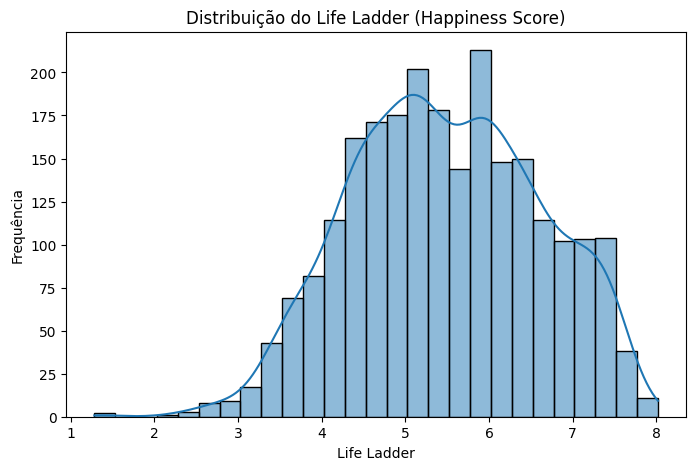

In [ ]:
#Verificar a distribuição do score de felicidade dos países (teste)
plt.figure(figsize=(8, 5))
sns.histplot(df['Life Ladder'], kde=True)
plt.title("Distribuição do Life Ladder (Happiness Score)")
plt.xlabel("Life Ladder")
plt.ylabel("Frequência")
plt.show()

# Tratamento de valores ausentes

In [ ]:
# Selecionar apenas colunas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Preencher valores ausentes nas colunas numéricas com a média
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

In [ ]:
print("Valores ausentes após o tratamento:")
print(df.isnull().sum())


Valores ausentes após o tratamento:
Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64


# Análise de Correlação

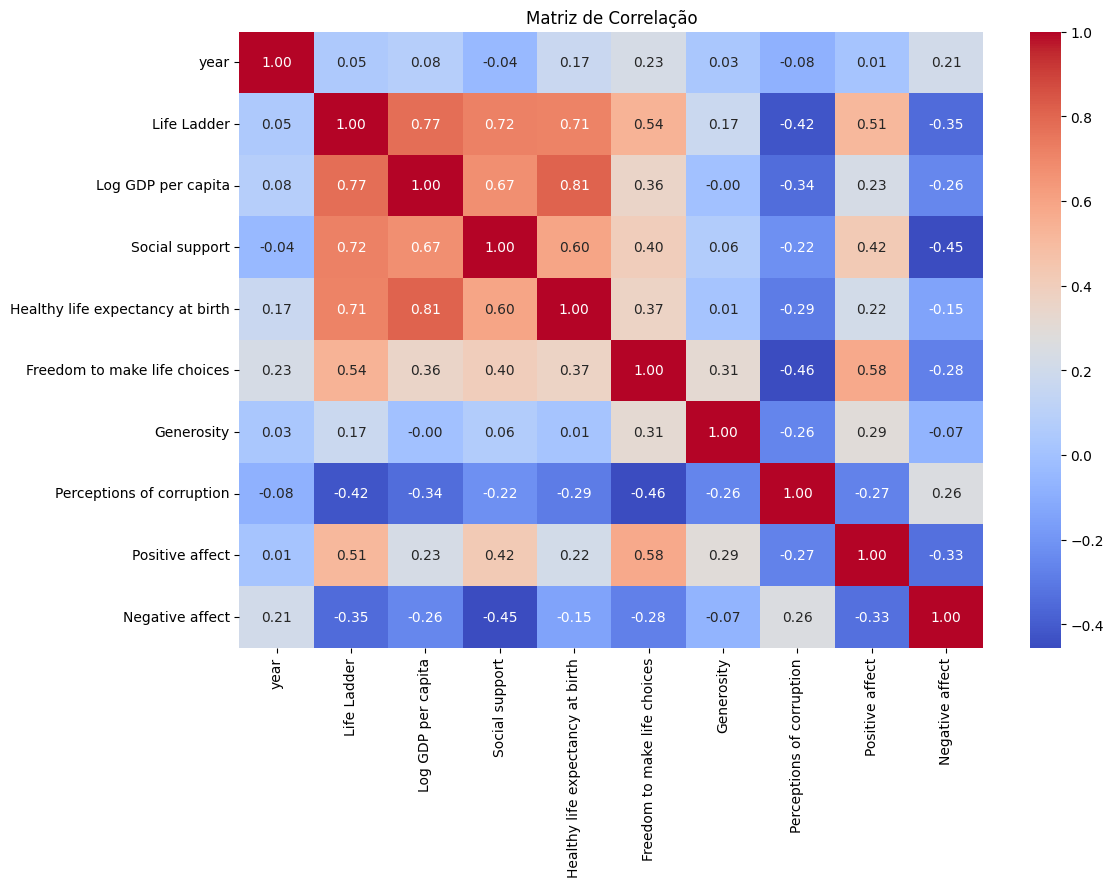

In [ ]:
# Selecionar apenas colunas numéricas para calcular a correlação
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()

# Exibir a matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

A matriz de correlação mostra como cada variável numérica está relacionada às outras. Os valores variam entre:

+1: Correlação perfeita positiva (quando uma variável aumenta, a outra também aumenta).

0: Sem correlação (as variáveis não estão relacionadas).

-1: Correlação perfeita negativa (quando uma variável aumenta, a outra diminui).

In [ ]:
# Ordenar correlações com Life Ladder
correlation_with_life_ladder = correlation_matrix["Life Ladder"].sort_values(ascending=False)

print("Correlação com Life Ladder:")
print(correlation_with_life_ladder)

Correlação com Life Ladder:
Life Ladder                         1.000000
Log GDP per capita                  0.774202
Social support                      0.720737
Healthy life expectancy at birth    0.710851
Freedom to make life choices        0.536172
Positive affect                     0.513569
Generosity                          0.173028
year                                0.046840
Negative affect                    -0.351755
Perceptions of corruption          -0.422719
Name: Life Ladder, dtype: float64


A análise das correlações com o Life Ladder (score de felicidade) revelou os seguintes insights:

Variáveis positivamente correlacionadas
- Log GDP per capita (0.77):
A maior correlação positiva, sugerindo que países com maior PIB per capita tendem a ter maiores níveis de felicidade.
- Social support (0.72):
O suporte social é outro fator crítico para a felicidade.
- Healthy life expectancy at birth (0.71):
A expectativa de vida saudável está fortemente relacionada à felicidade.
- Freedom to make life choices (0.53):
Liberdade para tomar decisões pessoais contribui significativamente para a felicidade.
- Positive affect (0.51):
Emoções positivas, como alegria, estão correlacionadas com níveis mais altos de felicidade.

Variáveis negativamente correlacionadas

- Perceptions of corruption (-0.42):
A percepção de corrupção tem uma correlação negativa significativa, indicando que quanto maior a corrupção percebida, menor é a felicidade.
- Negative affect (-0.35):
Emoções negativas, como tristeza ou raiva, também diminuem os níveis de felicidade.

# Modelagem preditiva

In [ ]:
# Selecionando as variáveis independentes (features) mais relevantes
features = ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth',
            'Freedom to make life choices', 'Positive affect', 'Perceptions of corruption']

# Variável dependente (target)
target = 'Life Ladder'

# Criando os DataFrames X (variáveis independentes) e y (variável dependente)
X = df[features]
y = df[target]

In [ ]:
# Dividindo os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificando os tamanhos dos conjuntos
print(f"Tamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")


Tamanho do conjunto de treino: (1890, 6)
Tamanho do conjunto de teste: (473, 6)


In [ ]:
# Criando e ajustando o modelo
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred_lr = model_lr.predict(X_test)

In [ ]:
# Avaliando o modelo com métricas de erro e precisão
from sklearn.metrics import mean_squared_error, r2_score

# Calculando as métricas
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Exibindo os resultados
print(f"MSE (Linear Regression): {mse_lr:.2f}")
print(f"R² Score (Linear Regression): {r2_lr:.2f}")

MSE (Linear Regression): 0.31
R² Score (Linear Regression): 0.76


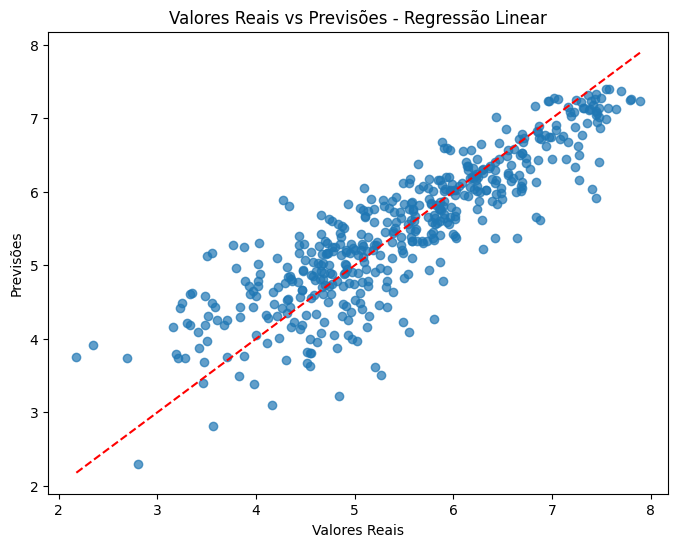

In [ ]:
# Visualizando os valores reais vs. previsões
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Linha de referência
plt.title("Valores Reais vs Previsões - Regressão Linear")
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.show()

Interpretação do gráfico:

O gráfico mostra uma boa relação entre os valores reais (y_test) e as previsões (y_pred_lr), especialmente próximo à linha de referência (linha vermelha).
